In [10]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [11]:
colors = {"orange" : "#E69F00", "light_blue" : "#56B4E9",
          "green" : "#009E73", "yellow" : "#F0E442",
          "blue" : "#0072B2", "red" : "#D55E00",
          "pink" : "#CC79A7", "black" : "#000000"}

In [12]:
data = pd.read_csv('sensitivity-grid.csv', index_col=[0,1,2,3,4,5,6,7])

In [13]:
#index = data.index
#data = data.reset_index()
#data = data[data['tau']!=1]
#data = data[data['hiring_firing']!=35] 
#data = data[data['industry']==0.10] 
#data = data.groupby(by=['production_function', 'consumer_facing', 'industry', 'retail', 'ratio_c_s', 'tau', 'hiring_firing']).mean()

## Print index associated with minimum

In [14]:
uw_min, w_min = data.idxmin()
print(uw_min)
print(w_min)

('linear', 0.3, 0.1, 0.2, 0.99, 0.5, 21, 28)
('half_critical', 0.3, 0.0, 0.2, 0.99, 0.5, 1, 28)


In [15]:
data.loc[w_min]

unweighted    7.161816
weighted      4.709283
Name: (half_critical, 0.3, 0.0, 0.2, 0.99, 0.5, 1, 28), dtype: float64

In [16]:
# use weighted data and subtract minimum
data = data['weighted']
data = data - data.loc[w_min]

In [17]:
# get index levels
prodfuncs = ['Leo', 'Strong', 'Half', 'Weak', 'Lin']#data.index.get_level_values('production_function').unique()
industry = data.index.get_level_values('industry').unique()
retail = data.index.get_level_values('retail').unique()
transport = data.index.get_level_values('transport').unique()
consumer_facing = data.index.get_level_values('consumer-facing').unique()
ratio_c_s = data.index.get_level_values('ratio_c_s').unique()
tau = data.index.get_level_values('tau').unique()
hiring_firing = data.index.get_level_values('hiring_firing').unique()

In [18]:
data.loc['half_critical',0.30,0,0.2,0.99,0.5,1,14]

0.25165076591563285

## 1D sensitivity through the optimal parameter set

In [19]:
[80, 85, 90,] + list(100*consumer_facing.values)

[80, 85, 90, 95.0, 99.0]

In [20]:
data.loc['half_critical',0.3,0.0,0.2,:,0.5,1,28].values

array([0.01555586, 0.        ])

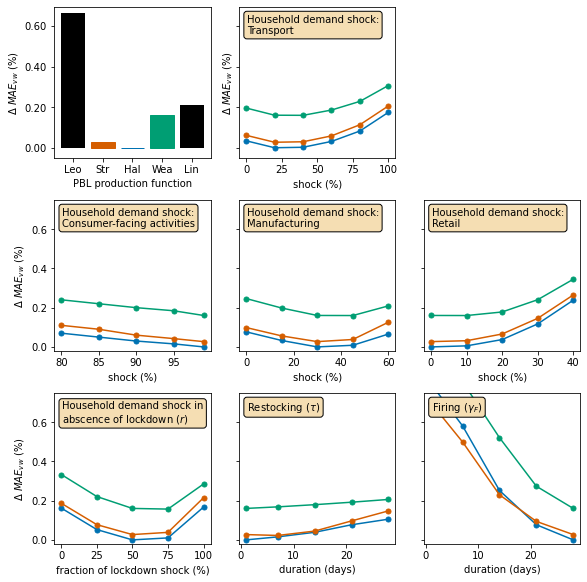

In [23]:
fig,ax = plt.subplots(nrows=3, ncols=3, sharey='row', figsize=(8.3, 0.7*11.7))

###############
## First row ##
###############

# PBL production functions
ax[0,0].bar(['Leo', 'Str', 'Hal', 'Wea', 'Lin'], data.loc[slice(None),0.3,0.0,0.2,0.99,0.5,1,28].values, color='black')
ax[0,0].set_ylabel('$\Delta\ MAE_{vw}$ (%)')
from matplotlib.ticker import FormatStrFormatter
ax[0,0].yaxis.set_major_formatter(FormatStrFormatter('%.2f'))
# text box with average euclidian distance in plane
props = dict(boxstyle='round', facecolor='white', alpha=1)
#ax[0,0].text(0.05, 0.95, "PBL production function", transform=ax[0,0].transAxes, fontsize=10,
#                verticalalignment='top', bbox=props)
ax[0,0].set_xlabel('PBL production function')
ax[0,0].set_ylim([-0.05,None])

ax[0,0].get_children()[1].set_color(colors['red'])
ax[0,0].get_children()[2].set_color(colors['blue'])
ax[0,0].get_children()[3].set_color(colors['green'])

# transport
ax[0,1].plot(100*transport, data.loc['half_critical',0.3,0.0,:,0.99,0.5,1,28], marker='o', markersize=5, color=colors['blue'])
ax[0,1].plot(100*transport, data.loc['strongly_critical',0.3,0.0,:,0.99,0.5,1,28], marker='o', markersize=5, color=colors['red'])
ax[0,1].plot(100*transport, data.loc['weakly_critical',0.3,0.0,:,0.99,0.5,1,28], marker='o', markersize=5, color=colors['green'])
# text box with average euclidian distance in plane
props = dict(boxstyle='round', facecolor='wheat', alpha=1)
ax[0,1].text(0.05, 0.95, "Household demand shock:\nTransport", transform=ax[0,1].transAxes, fontsize=10,
                verticalalignment='top', bbox=props)
ax[0,1].set_xlabel('shock (%)')
ax[0,1].set_ylabel('$\Delta\ MAE_{vw}$ (%)')
ax[0,1].set_xlabel('shock (%)')

#fig.delaxes(ax[0,1])
fig.delaxes(ax[0,2])

################
## Second row ##
################

x = [80, 85, 90,] + list(100*consumer_facing.values)
ax[1,0].plot(x, [0.07, 0.05, 0.03,] + list(data.loc['half_critical',0.3,0.0,0.2,:,0.5,1,28].values), marker='o', markersize=5, color=colors['blue'])
ax[1,0].plot(x, [0.11, 0.09, 0.06,] + list(data.loc['strongly_critical',0.3,0.0,0.2,:,0.5,1,28].values), marker='o', markersize=5, color=colors['red'])
ax[1,0].plot(x, [0.24, 0.22, 0.20,] + list(data.loc['weakly_critical',0.3,0.0,0.2,:,0.5,1,28].values), marker='o', markersize=5, color=colors['green'])
# text box with average euclidian distance in plane
props = dict(boxstyle='round', facecolor='wheat', alpha=1)
ax[1,0].text(0.05, 0.95, "Household demand shock:\nConsumer-facing activities", transform=ax[1,0].transAxes, fontsize=10,
                verticalalignment='top', bbox=props)
ax[1,0].set_xlabel('shock (%)')
ax[1,0].set_ylabel('$\Delta\ MAE_{vw}$ (%)')
ax[1,0].set_xlabel('shock (%)')

ax[1,1].plot(100*industry, data.loc['half_critical',:,0.0,0.2,0.99,0.5,1,28], marker='o', markersize=5, color=colors['blue'])
ax[1,1].plot(100*industry, data.loc['strongly_critical',:,0.0,0.2,0.99,0.5,1,28], marker='o', markersize=5, color=colors['red'])
ax[1,1].plot(100*industry, data.loc['weakly_critical',:,0.0,0.2,0.99,0.5,1,28], marker='o', markersize=5, color=colors['green'])
# text box with average euclidian distance in plane
props = dict(boxstyle='round', facecolor='wheat', alpha=1)
ax[1,1].text(0.05, 0.95, "Household demand shock:\nManufacturing", transform=ax[1,1].transAxes, fontsize=10,
                verticalalignment='top', bbox=props)
ax[1,1].set_xlabel('shock (%)')

ax[1,2].plot(100*retail,  data.loc['half_critical',0.3,:,0.2,0.99,0.5,1,28], marker='o', markersize=5, color=colors['blue'])
ax[1,2].plot(100*retail, data.loc['strongly_critical',0.3,:,0.2,0.99,0.5,1,28], marker='o', markersize=5, color=colors['red'])
ax[1,2].plot(100*retail, data.loc['weakly_critical',0.3,:,0.2,0.99,0.5,1,28], marker='o', markersize=5, color=colors['green'])
# text box with average euclidian distance in plane
props = dict(boxstyle='round', facecolor='wheat', alpha=1)
ax[1,2].text(0.05, 0.95, "Household demand shock:\nRetail", transform=ax[1,2].transAxes, fontsize=10,
                verticalalignment='top', bbox=props)
ax[1,2].set_xlabel('shock (%)')
ax[1,2].set_ylim([-0.02,0.75])

###############
## Third row ##
###############

ax[2,0].plot(100*ratio_c_s, data.loc['half_critical',0.3,0.0,0.2,0.99,:,1,28], marker='o', markersize=5, color=colors['blue'])
ax[2,0].plot(100*ratio_c_s, data.loc['strongly_critical',0.3,0.0,0.2,0.99,:,1,28], marker='o', markersize=5, color=colors['red'])
ax[2,0].plot(100*ratio_c_s, data.loc['weakly_critical',0.3,0.0,0.2,0.99,:,1,28], marker='o', markersize=5, color=colors['green'])
# text box with average euclidian distance in plane
props = dict(boxstyle='round', facecolor='wheat', alpha=1)
ax[2,0].text(0.05, 0.95, "Household demand shock in\nabscence of lockdown ($r$)", transform=ax[2,0].transAxes, fontsize=10,
                verticalalignment='top', bbox=props)
ax[2,0].set_xlabel('fraction of lockdown shock (%)')
ax[2,0].set_ylabel('$\Delta\ MAE_{vw}$ (%)')

ax[2,1].plot(tau, data.loc['half_critical',0.3,0.0,0.2,0.99,0.5,:,28], marker='o', markersize=5, color=colors['blue'])
ax[2,1].plot(tau, data.loc['strongly_critical',0.3,0.0,0.2,0.99,0.5,:,28], marker='o', markersize=5, color=colors['red'])
ax[2,1].plot(tau, data.loc['weakly_critical',0.3,0.0,0.2,0.99,0.5,:,28], marker='o', markersize=5, color=colors['green'])
# text box with average euclidian distance in plane
props = dict(boxstyle='round', facecolor='wheat', alpha=1)
ax[2,1].text(0.05, 0.95, "Restocking ($\\tau$)", transform=ax[2,1].transAxes, fontsize=10,
                verticalalignment='top', bbox=props)
ax[2,1].set_xlabel('duration (days)')

ax[2,2].plot(hiring_firing, data.loc['half_critical',0.3,0.0,0.2,0.99,0.5,1,:], marker='o', markersize=5, color=colors['blue'])
ax[2,2].plot(hiring_firing, data.loc['strongly_critical',0.3,0.0,0.2,0.99,0.5,1,:], marker='o', markersize=5, color=colors['red'])
ax[2,2].plot(hiring_firing, data.loc['weakly_critical',0.3,0.0,0.2,0.99,0.5,1,:], marker='o', markersize=5, color=colors['green'])
# text box with average euclidian distance in plane
props = dict(boxstyle='round', facecolor='wheat', alpha=1)
ax[2,2].text(0.05, 0.95, "Firing ($\\gamma_F$)", transform=ax[2,2].transAxes, fontsize=10,
                verticalalignment='top', bbox=props)
ax[2,2].set_xlabel('duration (days)')
ax[2,2].set_ylim([-0.02,0.75])

plt.tight_layout()
fig.savefig('slice_minimum.pdf')
plt.show()
plt.close()

## Restocking, production function and exogenous demand

In [62]:
(transport*100).values

array([  0.,  20.,  40.,  60.,  80., 100.])

In [57]:
np.transpose(data.loc[slice(None),0.3,0,slice(None),0.99,0.5,1,28].values.reshape([5,6]))[:-1,:]

array([[0.68862973, 0.06121856, 0.03418453, 0.19561514, 0.25687738],
       [0.66156706, 0.02696535, 0.        , 0.16023056, 0.21291435],
       [0.66559311, 0.02937209, 0.0022584 , 0.15961195, 0.20476566],
       [0.69266392, 0.05833973, 0.03107656, 0.18566962, 0.21966284],
       [0.75857321, 0.11336111, 0.08241977, 0.22840639, 0.24974513]])

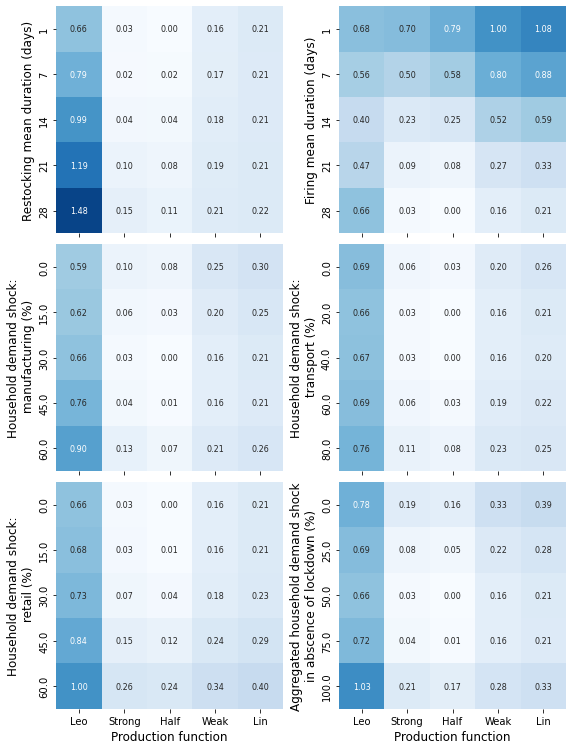

In [64]:
# Extend with exogenous demand (3 panels)

fig,ax=plt.subplots(nrows=3, ncols=2, sharex=True, sharey=False, figsize=(8.3,0.9*11.7))

## first row
# restocking
ax[0,0] = sns.heatmap(np.transpose(data.loc[slice(None),0.3,0.0,0.2,0.99,0.5,slice(None),28].values.reshape([5,5])), xticklabels=prodfuncs, yticklabels=tau,
                    annot=True, fmt=".2f", vmin=0, vmax=1.6, cbar=False, ax=ax[0,0], square=True, annot_kws={"fontsize": 8},
                    cmap="Blues")
ax[0,0].set_ylabel('Restocking mean duration (days)', size=12)

# hiring/firing
ax[0,1] = sns.heatmap(np.transpose(data.loc[slice(None),0.3,0.0,0.2,0.99,0.5,1,slice(None)].values.reshape([5,5])), xticklabels=prodfuncs, yticklabels=hiring_firing,
                    annot=True, fmt=".2f", vmin=0, vmax=1.6, cbar=False, ax=ax[0,1], square=True, annot_kws={"fontsize": 8},
                    cmap="Blues")
ax[0,1].set_ylabel('Firing mean duration (days)', size=12)

## second row
# household demand manufacturing
ax[1,0] = sns.heatmap(np.transpose(data.loc[slice(None),slice(None),0,0.2,0.99,0.5,1,28].values.reshape([5,5])), xticklabels=prodfuncs, yticklabels=industry*100,
                    annot=True, fmt=".2f", vmin=0, vmax=1.6, cbar=False, ax=ax[1,0], square=True, annot_kws={"fontsize": 8},
                    cmap="Blues")
ax[1,0].set_ylabel('Household demand shock:\n manufacturing (%)', size=12)

# household demand transport
ax[1,1] = sns.heatmap(np.transpose(data.loc[slice(None),0.3,0,slice(None),0.99,0.5,1,28].values.reshape([5,6]))[:-1,:], xticklabels=prodfuncs, yticklabels=(transport*100).values[:-1],
                    annot=True, fmt=".2f", vmin=0, vmax=1.6, cbar=False, ax=ax[1,1], square=True, annot_kws={"fontsize": 8},
                    cmap="Blues")
ax[1,1].set_ylabel('Household demand shock:\n transport (%)', size=12)

# household demand retail
ax[2,0] = sns.heatmap(np.transpose(data.loc[slice(None),0.3,slice(None),0.2,0.99,0.5,1,28].values.reshape([5,5])), xticklabels=prodfuncs, yticklabels=industry*100,
                    annot=True, fmt=".2f", vmin=0, vmax=1.6, cbar=False, ax=ax[2,0], square=True, annot_kws={"fontsize": 8},
                    cmap="Blues")
ax[2,0].set_xlabel('Production function', size=12)
ax[2,0].set_ylabel('Household demand shock:\n retail (%)', size=12)

# aggregated household demand shock in abscence of lockdown
ax[2,1].set_xlabel('Production function', size=12)
ax[2,1] = sns.heatmap(np.transpose(data.loc[slice(None),0.3,0.0,0.2,0.99,slice(None),1,28].values.reshape([5,5])), xticklabels=prodfuncs, yticklabels=ratio_c_s*100,
                    annot=True, fmt=".2f", vmin=0, vmax=1.6, cbar=False, ax=ax[2,1], square=True, annot_kws={"fontsize": 8},
                    cmap="Blues")
ax[2,1].set_xlabel('Production function', size=12)
ax[2,1].set_ylabel('Aggregated household demand shock\nin abscence of lockdown (%)', size=12)

plt.tight_layout()
plt.savefig('prodfunc_tau.pdf')
plt.show()